# Part 1: Simulating the robot

In [1]:
import numpy as np
import random as rand
import numpy as np
import matplotlib.pyplot as plt
import math
import csv
from scipy.stats import norm
import seaborn as sns
import pandas as pd

def func(U,x):
    #-2x+2U
    val = -(2*x) + 2*U
    return val
def simulation(x,t,h):
    save = 0
    U_save = []
    t_save = []
    x_save = []
    x_exact_save = []

    U_array = []
    t_array = []
    x_array = []
    x_exact_array = []
    while(t <= 15):
        if(t <= 5):
            U = 2
        elif(t < 5 or t <= 10):
            U = 1
        elif(t < 10 or t <=15):
            U = 3
        #print("U value:", x)
        U_array.append(U)
        k = h * func(U,x)
        x = x + k
        t = t + h
        #value under graph
        x_exact = U - math.exp(-2*t)
        t_array.append(t)
        x_array.append(x)
        x_exact_array.append(x_exact)
        save+=1
        #save every 10th integral if h<=0.01
        if(save%10 == 0):
            U_save.append(U)
            t_save.append(t)
            x_save.append(x)
            x_exact_save.append(x_exact)
            #print("save1: ",save)
        #print("Where it is: ",x,"Exact pos= ",x_exact,"Time: ",t)
    return U_save,t_save,x_save,x_exact_save,U_array,t_array,x_array,x_exact_array 

The following step sizes were provided to measure against: 0.75, .5, 0.25, 0.01, 0.001


## Step size 0.001

In [2]:
U_save1 = []
t_save1 = []
x_save1 = []
x_exact_save1 = []


##saves every time
U_array1 = []
t_array1 = []
x_array1 = []
x_exact_array1 = []

#step size 
U_save1,t_save1,x_save1,x_exact_save1,U_array1,t_array1,x_array1,x_exact_array1=simulation(0,0,0.001)

#0.35 for bell curve

## Step size 0.01

In [3]:
U_save2 = []
t_save2 = []
x_save2 = []
x_exact_save2 = []


##saves every time
U_array2 = []
t_array2 = []
x_array2 = []
x_exact_array2 = []

#step size 
U_save2,t_save2,x_save2,x_exact_save2,U_array2,t_array2,x_array2,x_exact_array2=simulation(0,0,0.01)

#0.35 for bell curve

## Step size 0.25

In [4]:
U_save3 = []
t_save3 = []
x_save3 = []
x_exact_save3 = []


##saves every time
U_array3 = []
t_array3 = []
x_array3 = []
x_exact_array3 = []

#step size 
U_save3,t_save3,x_save3,x_exact_save3,U_array3,t_array3,x_array3,x_exact_array3=simulation(0,0,0.25)

## Step size 0.5

In [5]:
U_save4 = []
t_save4 = []
x_save4 = []
x_exact_save4 = []


##saves every time
U_array4 = []
t_array4 = []
x_array4 = []
x_exact_array4 = []

#step size 
U_save4,t_save4,x_save4,x_exact_save4,U_array4,t_array4,x_array4,x_exact_array4=simulation(0,0,0.5)

## Step size 0.75

In [6]:
U_save5 = []
t_save5 = []
x_save5 = []
x_exact_save5 = []


##saves every time
U_array5 = []
t_array5 = []
x_array5 = []
x_exact_array5 = []

#step size 
U_save5,t_save5,x_save5,x_exact_save5,U_array5,t_array5,x_array5,x_exact_array5=simulation(0,0,0.75)

## Saving values into a dataframe and plotting it 

In [7]:
data1 = {'X':x_array1,'T':t_array1}
df1 = pd.DataFrame(data1)
data2 = {'X':x_array2,'T':t_array2}
df2= pd.DataFrame(data2)
data3 = {'X':x_array3,'T':t_array3}
df3= pd.DataFrame(data3)
data4= {'X':x_array4,'T':t_array4}
df4= pd.DataFrame(data4)
data5= {'X':x_array5,'T':t_array5}
df5= pd.DataFrame(data5)

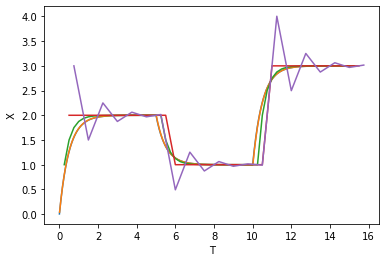

In [8]:
plt3 = sns.lineplot(x="T", y="X", data=df1) #blue
plt4 = sns.lineplot(x="T", y="X", data=df2) #Orange
plt5 = sns.lineplot(x="T", y="X", data=df3) #Green
plt6 = sns.lineplot(x="T", y="X", data=df4) #Red
plt7 = sns.lineplot(x="T", y="X", data=df5) #Purple

## Error evaluation against step size

# Part 2: Random Noise using Box Muller Method

## Initialise/Compute standard deviation and mean

In [9]:
import statistics as stat
std_dev1 = stat.stdev(x_array1)
_mean1 = stat.mean(x_array1)

std_dev = 0.0431
_mean = 0.5
print("deviation: ",std_dev,"mean: ",_mean,"DEVIATION: ",std_dev1,"MEAN: ",_mean1)

deviation:  0.0431 mean:  0.5 DEVIATION:  0.7789244866974134 MEAN:  1.900142980914039


## compute box muller algorithm

In [10]:
def box_muller(array,standard_deviation,mean):
    random_vls = []
    i = 0
    it = 0
    while i < len(array):
        if(it == 0):
            z1 =  rand.uniform(0,2*np.pi)
            b  =  standard_deviation*np.sqrt(-2*math.log(rand.uniform(0,1)))
            z2 =  b*(math.sin(z1))+mean
            z3 =  b*(math.cos(z1))+mean
            noise = array[i] + z2
            random_vls.append(noise)
            it = 1
            i = i + 1
        else:
            it = 0
            noise = array[i] + z3
            random_vls.append(noise)
            i= i + 1
    return random_vls

In [11]:
random_vals = []
random_vals = box_muller(x_save2,std_dev,_mean)

## Noise plot

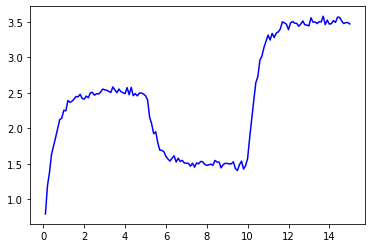

In [12]:
y = random_vals
x = t_save2
plt.plot(x,y,"b") #actual
plt.show()

## Proof that numbers generated fall within a gaussian distribution

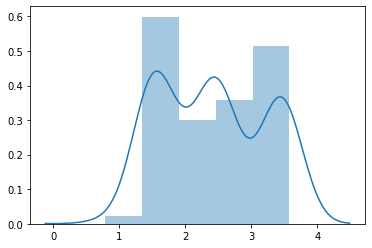

In [13]:
sns.distplot(random_vals)

# Part 3: Adding an intelligent agent to track the noise

In [311]:
##--------------------------------SINGLE PERCEPTRON-----------------------------------------------##
def sigmoid_activation(val):
  sigmoid = 1/1+np.exp(-val)
  return sigmoid

def predict_step(noise1,weights1):
    net_sum = 0
    net_sum = weights1[0]
    for i in range(len(noise1)-1):
        net_sum += weights1[i + 1] * noise1[i]
    print(net_sum)
    return 1.0 if net_sum >= 5 else 0.0
###---------------------------------------------------------------------------------------------------------
def predict(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    net_sum += weights2[1]*noise2
    activation2 = sigmoid_activation(net_sum)
    return activation2, net_sum

def train_weights(array, lr, loops):
    weights3 = [-0.10,rand.uniform(0,1)]
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        for a in array:
            prediction, netwrk_sum = predict(a,weights3)
            Target = a
            delta = Target - prediction
            error = delta
            error_array.append(error)
            net_array.append(prediction)
            weights3_change_bias= -lr*Target*error
            weights3[0] = weights3[0] + weights3_change_bias
            weights3_change= -lr*Target*error
            weights3[1] = weights3[1] + weights3_change
            sum_error += error**2
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (loop, lr, error))
    return net_array,error_array
##-----------------------------------------------------------------------------------------------------------
def train_weights_step(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]
    itr = 0
    weights3_1 = []
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        w_adaptor = 0
        if itr < 1:
            for a in array:
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction = predict_step(a,weights3)
                print("prediction: ", prediction)
                print(weights3)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0]*(error)*lr 
                #print(weights3_change_bias)
                weights3[0] = weights3[0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
                for i in range(len(a)):
                    weights3[i + 1] = weights3[i +1] + weights3_change
                sum_error += error**2
                c = c + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
        else:
            for a in array:
                #weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction = predict_step(a,weights3_1[w_adaptor])
                print("prediction1: ", prediction)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = prediction - Target
                error = delta
                print("error",error)
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) 
                #print(weights3_change_bias)
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
                for i in range(len(a)):
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change
                sum_error += error**2
                c = c + 1
                w_adaptor = w_adaptor + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
    return net_array,error_array,weights3_1
####---------------------------------------MULTI PERCEPTRON---------------------------------------------####
def train_weights3(array, lr, loops):
    weights3 = [1,rand.uniform(0,1),rand.uniform(0,1),rand.uniform(0,1)]
    itr = 0
    weights3_1 = []
    for loop in range(loops):
        net_array = []
        error_array = []
        sum_error = 0.0
        c = 0
        w_adaptor = 0
        if itr < 1:
            for a in array:
                weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction, netwrk_sum = predict3(a,weights3)
                #print(weights3)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
                weights3_change_bias = -a[0] *lr*(error) 
                #print(weights3_change_bias)
                weights3[0] = weights3[0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
            
                for i in range(len(a)):
                    weights3[i + 1] = weights3[i +1] + weights3_change
                sum_error += error**2
                c = c + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
        else:
            for a in array:
                #weights3_1.append([weights3[0],weights3[1],weights3[2],weights3[3]])
                prediction, netwrk_sum = predict3(a,weights3_1[w_adaptor])
                #print(weights3_1)
                if c == 0:
                    Target = a[2]
                    #print(1)
                elif c==1:
                    Target = a[1]
                else:
                    Target = a[0]
                delta = Target - prediction
                error = delta
                error_array.append(error)
                net_array.append(prediction)
                #------------------------WEIGHTS UPDATED BY CORRESPONDING CURRENT ERROR AND INPUT----------------------------------
            
                weights3_change_bias = -a[0] *lr*(error) 
                #print(weights3_change_bias)
                weights3_1[w_adaptor][0] = weights3_1[w_adaptor][0] + weights3_change_bias
                weights3_change= -a[0]*(error)*lr
                for i in range(len(a)):
                     weights3_1[w_adaptor][i + 1] =  weights3_1[w_adaptor][i +1] + weights3_change
                sum_error += error**2
                c = c + 1
                w_adaptor = w_adaptor + 1
            print('>epoch=%d, lrate=%.3f, error=%.3f, , sum_error=%.3f' % (loop, lr, error, sum_error))
            itr+=1
    return net_array,error_array,weights3_1
            
def predict3(noise2,weights2):
    net_sum = 0
    net_sum = weights2[0]
    for i in range(len(noise2)-1):
        net_sum += weights2[i + 1] * noise2[i]
    activation2 = sigmoid_activation(net_sum)
    #print("activation",activation2,"sum",net_sum)
    return activation2, net_sum
#def weight_save_array(array):
    #saved_weights
def triple_converter(array):
    triple_array = []
    c = 0
    while c < len(array):
        if c == 0:
            triple_array.append([0,0,array[c]])
        elif c == 1:
            triple_array.append([0,array[c],array[c-1]])
        else:
            triple_array.append([array[c],array[c-1],array[c-2]])
        c = c + 1
    return triple_array

In [312]:
values1,x,y = train_weights_step(dat1, 0.006531,10)

1.0
prediction:  0.0
[1, 0.20649963258226733, 0.8687059148312526, 0.194284713413176]
2.0317421096328614
prediction:  0.0
[1.0, 0.20649963258226733, 0.8687059148312526, 0.194284713413176]
2.3168657298170814
prediction:  0.0
[1.0, 0.20649963258226733, 0.8687059148312526, 0.194284713413176]
2.58713877071272
prediction:  0.0
[1.0124510939579594, 0.21895072654022676, 0.881157008789212, 0.20673580737113542]
2.913441447949723
prediction:  0.0
[1.029914695339529, 0.23641432792179637, 0.8986206101707817, 0.22419940875270503]
3.1385262865765524
prediction:  0.0
[1.049950350774772, 0.2564499833570393, 0.9186562656060245, 0.24423506418794794]
3.39025268316999
prediction:  0.0
[1.0727868305121009, 0.27928646309436816, 0.9414927453433535, 0.2670715439252768]
3.6757606110557646
prediction:  0.0
[1.0987585741237598, 0.30525820670602705, 0.9674644889550124, 0.2930432875369357]
3.9596479756777123
prediction:  0.0
[1.1281634572983945, 0.3346630898806617, 0.996869372129647, 0.32244817071157034]
4.17688966

8.307219742825692
prediction1:  1.0
error -0.5470666829846937
8.44912883465471
prediction1:  1.0
error -0.5246466205738414
8.41677406479267
prediction1:  1.0
error -0.5233734275000832
8.297774948652421
prediction1:  1.0
error -0.4422166543144628
8.204745112688194
prediction1:  1.0
error -0.4880083784946194
8.36031098818611
prediction1:  1.0
error -0.5063455439450433
8.418542244932015
prediction1:  1.0
error -0.5039328351558534
8.423032774161328
prediction1:  1.0
error -0.49822364398162344
8.429203002846172
prediction1:  1.0
error -0.49818339115926347
8.500442327928189
prediction1:  1.0
error -0.5283204955872027
8.42573066048208
prediction1:  1.0
error -0.4318267710369903
8.170439229593905
prediction1:  1.0
error -0.40529232760198064
8.265272378643658
prediction1:  1.0
error -0.4879000905309532
8.562582951100584
prediction1:  1.0
error -0.536782376717154
8.506061058074415
prediction1:  1.0
error -0.4258396086526701
8.343685743773971
prediction1:  1.0
error -0.47363756449123007
8.6538310

prediction1:  1.0
error -1.5035108087340046
8.97300815570882
prediction1:  1.0
error -1.5815995178178879
9.196296474020144
prediction1:  1.0
error -1.53808044347868
9.208949207982844
prediction1:  1.0
error -1.5005900717998375
9.380612152439067
prediction1:  1.0
error -1.5518292696476639
9.563009843279366
prediction1:  1.0
error -1.514334240538687
9.616815402398032
prediction1:  1.0
error -1.4992334443806228
9.712934600059004
prediction1:  1.0
error -1.4868867935093788
9.993269576447119
prediction1:  1.0
error -1.5715813981755478
10.127107050688892
prediction1:  1.0
error -1.4721943699882822
10.276288546946688
prediction1:  1.0
error -1.575618854328062
10.41093501465939
prediction1:  1.0
error -1.4577082817647855
10.375056007039916
prediction1:  1.0
error -1.4877026196104692
10.515281714187186
prediction1:  1.0
error -1.455184482152322
10.669255881705784
prediction1:  1.0
error -1.4961492433489183
10.897634853855681
prediction1:  1.0
error -1.4953182490756736
11.012833112375878
predict

error -2.4930113336599415
31.612352411966647
prediction1:  1.0
error -2.4953616794328015
31.958040610111073
prediction1:  1.0
error -2.473602326839105
32.455757822835324
prediction1:  1.0
error -2.499750610094429
33.01483120529748
prediction1:  1.0
error -2.497686780396561
33.91254689671305
prediction1:  1.0
error -2.576492864325304
34.07858205509544
prediction1:  1.0
error -2.4591990084075275
34.34906920166578
prediction1:  1.0
error -2.521469306371628
34.76928014989276
prediction1:  1.0
error -2.464811875310508
35.00027309405088
prediction1:  1.0
error -2.473460385471244
35.73013117209124
prediction1:  1.0
error -2.514374178099279
36.24504231222012
prediction1:  1.0
error -2.4906993674076134
37.02719008310983
prediction1:  1.0
error -2.563191605894505
37.85687426022034
prediction1:  1.0
error -2.561845150903313
38.0126199865812
prediction1:  1.0
error -2.5103795881160247
37.98945976652816
prediction1:  1.0
error -2.4738187771301146
38.33094830156109
prediction1:  1.0
error -2.4864437

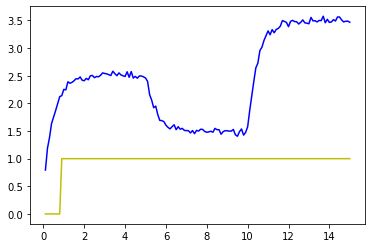

In [313]:
y_axis = random_vals #network output
y = values1
x_axis = x = t_save2
plt.plot(x,y,"y") #robot
plt.plot(x_axis,y_axis,"b")#tracker
plt.show()

## Train network using sigmoid

In [314]:
dat1 = triple_converter(random_vals)
values,e,w = train_weights3(dat1, 0.01,20)
#0.006531

#save to dataframe
data6= {'Noise_values':dat1,'Trained':values,'Error':e,'T':t_save2}
df6= pd.DataFrame(data6)

>epoch=0, lrate=0.010, error=-0.023, , sum_error=23.853
>epoch=1, lrate=0.010, error=-0.023, , sum_error=23.853
>epoch=2, lrate=0.010, error=-0.007, , sum_error=20.162
>epoch=3, lrate=0.010, error=-0.002, , sum_error=17.352
>epoch=4, lrate=0.010, error=-0.001, , sum_error=15.040
>epoch=5, lrate=0.010, error=-0.000, , sum_error=13.084
>epoch=6, lrate=0.010, error=-0.000, , sum_error=11.405
>epoch=7, lrate=0.010, error=-0.000, , sum_error=9.952
>epoch=8, lrate=0.010, error=-0.000, , sum_error=8.690
>epoch=9, lrate=0.010, error=-0.000, , sum_error=7.593
>epoch=10, lrate=0.010, error=-0.000, , sum_error=6.641
>epoch=11, lrate=0.010, error=-0.000, , sum_error=5.818
>epoch=12, lrate=0.010, error=-0.000, , sum_error=5.107
>epoch=13, lrate=0.010, error=-0.000, , sum_error=4.495
>epoch=14, lrate=0.010, error=-0.000, , sum_error=3.969
>epoch=15, lrate=0.010, error=-0.000, , sum_error=3.517
>epoch=16, lrate=0.010, error=-0.000, , sum_error=3.129
>epoch=17, lrate=0.010, error=-0.000, , sum_error=2

In [286]:
w[0]

[1.0, 0.12332270428094816, 0.4584407355288723, 0.1511065191391059]

In [287]:
w[0]

[1.0, 0.12332270428094816, 0.4584407355288723, 0.1511065191391059]

In [288]:
df6

,Noise_values,Trained,Error,T
0,"[0, 0, 0.7938774463131204]",1.367879,-5.740020e-01,0.1
1,"[0, 1.187677086132513, 0.7938774463131204]",1.213423,-2.574583e-02,0.2
2,"[1.380746380120701, 1.187677086132513, 0.79387...",1.212199,1.685474e-01,0.3
3,"[1.6352232861181726, 1.380746380120701, 1.1876...",1.267168,3.680548e-01,0.4
4,"[1.751507233564055, 1.6352232861181726, 1.3807...",1.307297,4.442098e-01,0.5
...,...,...,...,...
145,"[3.5103795881160247, 3.561845150903313, 3.5631...",3.510380,-8.206769e-13,14.6
146,"[3.4738187771301146, 3.5103795881160247, 3.561...",3.473819,4.596323e-13,14.7
147,"[3.4864437438824605, 3.4738187771301146, 3.510...",3.486444,3.082423e-12,14.8
148,"[3.4876449046592666, 3.4864437438824605, 3.473...",3.487645,2.176037e-13,14.9


## Network prediction(blue) against noise values(yellow)

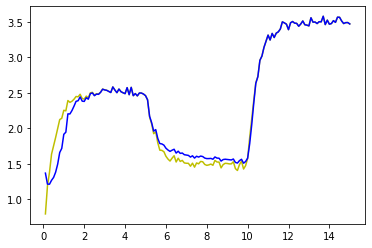

In [289]:
y_axis = values #network output
y = random_vals
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Train network using step function

1.0
1.783965469314265
2.1702478024790244
2.382671482239294
2.6142117411379693
2.7662249330612583
2.935390052570954
3.126783860268492
3.3042159479897384
3.441303626211731
3.622362594005815
3.7733453459273076
4.00007642817053
4.107128791239287
4.256548642193751
4.427547048126778
4.594051345396066
4.744147858134692
4.886872445756328
4.957260347266229
5.1028694275920214
5.266637479011626
5.419921600714483
5.6432141882063505
5.770444228528666
5.882726183386254
6.045963032594665
6.2043534527614845
6.417199116143486
6.6166803285955105
6.7545092143941385
6.888225526593583
7.006068487907492
7.204642126994816
7.428959831004781
7.490557923114802
7.637841123645204
7.827765500782797
7.90983499135989
8.022128998570402
8.24050666802307
8.416297619658991
8.52674262010856
8.709538123242577
8.701661413620078
8.85372296234068
8.990437155652835
9.20162773162112
9.328134647591682
9.418488896977642
9.441220110871683
9.142693993578378
8.678392092925565
8.388621299081215
8.24046764244493
8.133069876107204
7.7

7.379400569562743
1.0
7.389560871055147
1.0
7.337473449400378
1.0
7.352209530459654
1.0
7.35706143011583
1.0
7.368959347676375
1.0
7.480486076766963
1.0
7.536051212952467
1.0
7.614486919523838
1.0
7.5597662922359
1.0
7.483494515208758
1.0
7.488670499684643
1.0
7.540438338670566
1.0
7.551465987833674
1.0
7.658846933298847
1.0
7.775861951459046
1.0
7.750574053383412
1.0
7.622861810207266
1.0
7.561051272519684
1.0
7.703897009532225
1.0
7.755925534158616
1.0
7.760533475852009
1.0
7.768544220388144
1.0
7.843369910816657
1.0
7.748148613052876
1.0
7.521782857363558
1.0
7.6335149345629185
1.0
7.90986028558128
1.0
7.825121774781852
1.0
7.703736725265541
1.0
8.010718531642567
1.0
8.81672621018484
1.0
10.025687817421566
1.0
11.244348208359874
1.0
12.524214928456276
1.0
13.467719977022867
1.0
14.47399153556561
1.0
15.427029466100457
1.0
16.207507739979015
1.0
17.087681299058115
1.0
17.921911637396857
1.0
18.289664644953348
1.0
18.775401405783988
1.0
19.212203633182284
1.0
19.639149367520467
1.0
20

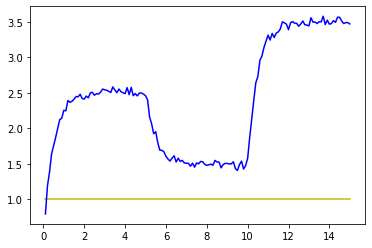

In [ ]:
df6

## Perceptron values against different noise samples(Sigmoid)

### Adding noise to other step sizes using box muller

#### Example 1(step size =0.1)

In [198]:
random_vals1 = []
random_vals1 = box_muller(x_save1,std_dev,_mean)
random_vals_t1 = []
random_vals_t1 = triple_converter(random_vals1)

#values,e = train_weights3(dat1, 0.01,1)
#0.006531
values1,e1,w = train_weights3(random_vals_t1, 0.01,40)

>epoch=0, lrate=0.010, error=0.054, , sum_error=40.068
>epoch=1, lrate=0.010, error=0.054, , sum_error=40.068
>epoch=2, lrate=0.010, error=0.018, , sum_error=33.322
>epoch=3, lrate=0.010, error=0.006, , sum_error=31.022
>epoch=4, lrate=0.010, error=0.002, , sum_error=29.418
>epoch=5, lrate=0.010, error=0.001, , sum_error=28.040
>epoch=6, lrate=0.010, error=0.000, , sum_error=26.792
>epoch=7, lrate=0.010, error=0.000, , sum_error=25.638
>epoch=8, lrate=0.010, error=0.000, , sum_error=24.557
>epoch=9, lrate=0.010, error=0.000, , sum_error=23.538
>epoch=10, lrate=0.010, error=0.000, , sum_error=22.573
>epoch=11, lrate=0.010, error=0.000, , sum_error=21.654
>epoch=12, lrate=0.010, error=0.000, , sum_error=20.779
>epoch=13, lrate=0.010, error=0.000, , sum_error=19.944
>epoch=14, lrate=0.010, error=0.000, , sum_error=19.147
>epoch=15, lrate=0.010, error=0.000, , sum_error=18.386
>epoch=16, lrate=0.010, error=0.000, , sum_error=17.659
>epoch=17, lrate=0.010, error=0.000, , sum_error=16.965
>e

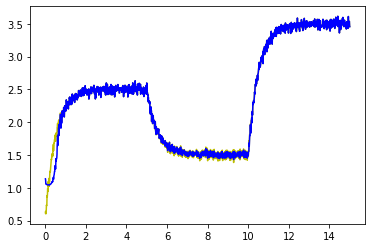

In [199]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save1
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation 

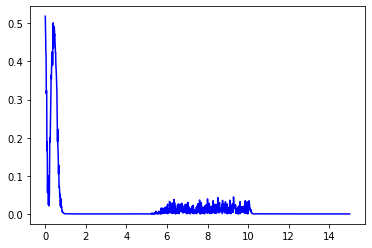

In [200]:
e_array = e1
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_save1
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [201]:
len(e1)

1500

In [202]:
data7= {'Noise_values':random_vals_t1,'Network_output':values1,'Error':e1,'T':t_save1}
vis= pd.DataFrame(data7)
vis

,Noise_values,Network_output,Error,T
0,"[0, 0, 0.616713102587944]",1.135335,5.186222e-01,0.01
1,"[0, 0.6397423327052195, 0.616713102587944]",1.117987,4.782443e-01,0.02
2,"[0.6005925277841491, 0.6397423327052195, 0.616...",1.056743,4.561504e-01,0.03
3,"[0.631485077629901, 0.6005925277841491, 0.6397...",1.055764,4.242784e-01,0.04
4,"[0.6400854905464024, 0.631485077629901, 0.6005...",1.054554,4.144681e-01,0.05
...,...,...,...,...
1495,"[3.4586456598985977, 3.4732518907423158, 3.516...",3.458646,0.000000e+00,14.96
1496,"[3.5195466088537968, 3.4586456598985977, 3.473...",3.519547,0.000000e+00,14.97
1497,"[3.537292486098129, 3.5195466088537968, 3.4586...",3.537292,0.000000e+00,14.98
1498,"[3.470596182793542, 3.537292486098129, 3.51954...",3.470596,4.440892e-16,14.99


#### Example 2(step size = 0.01)

In [203]:
random_vals2 = []
random_vals2 = box_muller(x_save2,std_dev,_mean)
random_vals_t2 =[]
random_vals_t2 = triple_converter(random_vals2)
values2,e2,w =train_weights3(random_vals_t2,0.01,20)

>epoch=0, lrate=0.010, error=-0.039, , sum_error=46.131
>epoch=1, lrate=0.010, error=-0.039, , sum_error=46.131
>epoch=2, lrate=0.010, error=-0.012, , sum_error=43.151
>epoch=3, lrate=0.010, error=-0.004, , sum_error=40.508
>epoch=4, lrate=0.010, error=-0.001, , sum_error=38.045
>epoch=5, lrate=0.010, error=-0.000, , sum_error=35.705
>epoch=6, lrate=0.010, error=-0.000, , sum_error=33.458
>epoch=7, lrate=0.010, error=-0.000, , sum_error=31.293
>epoch=8, lrate=0.010, error=-0.000, , sum_error=29.201
>epoch=9, lrate=0.010, error=-0.000, , sum_error=27.183
>epoch=10, lrate=0.010, error=-0.000, , sum_error=25.238
>epoch=11, lrate=0.010, error=-0.000, , sum_error=23.369
>epoch=12, lrate=0.010, error=-0.000, , sum_error=21.579
>epoch=13, lrate=0.010, error=-0.000, , sum_error=19.872
>epoch=14, lrate=0.010, error=-0.000, , sum_error=18.250
>epoch=15, lrate=0.010, error=-0.000, , sum_error=16.716
>epoch=16, lrate=0.010, error=-0.000, , sum_error=15.272
>epoch=17, lrate=0.010, error=-0.000, , s

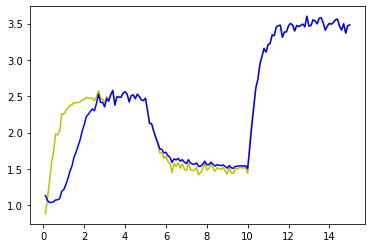

In [204]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

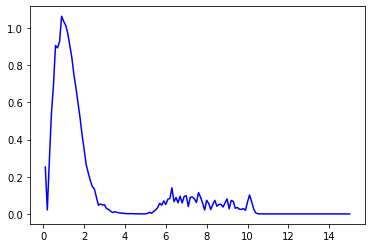

In [205]:
e_array = e2
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_save2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [206]:
len(values2)

150

In [207]:
data8= {'Noise_values':random_vals_t2,'Network_output':values2,'Error':e2,'T':t_save2}
vis1= pd.DataFrame(data8)
vis1

,Noise_values,Network_output,Error,T
0,"[0, 0, 0.8830280783570628]",1.135335,2.523072e-01,0.1
1,"[0, 1.0909121398362962, 0.8830280783570628]",1.069379,2.153324e-02,0.2
2,"[1.3306451882765993, 1.0909121398362962, 0.883...",1.038823,2.918221e-01,0.3
3,"[1.5805448631752452, 1.3306451882765993, 1.090...",1.042169,5.383763e-01,0.4
4,"[1.7401862719668753, 1.5805448631752452, 1.330...",1.048366,6.918201e-01,0.5
...,...,...,...,...
145,"[3.4114959842133215, 3.4609691676977903, 3.560...",3.411496,2.974918e-10,14.6
146,"[3.4966634599078446, 3.4114959842133215, 3.460...",3.496663,5.569811e-11,14.7
147,"[3.367531255923868, 3.4966634599078446, 3.4114...",3.367531,1.380435e-09,14.8
148,"[3.470566353395201, 3.367531255923868, 3.49666...",3.470566,1.994929e-10,14.9


#### Example 3(step size = 0.5)

In [208]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(random_vals3)
values3,e3,w = train_weights3(random_vals_t3, 0.011,100)

>epoch=0, lrate=0.011, error=0.023, , sum_error=52.035
>epoch=1, lrate=0.011, error=0.023, , sum_error=52.035
>epoch=2, lrate=0.011, error=0.006, , sum_error=45.691
>epoch=3, lrate=0.011, error=0.001, , sum_error=39.501
>epoch=4, lrate=0.011, error=0.000, , sum_error=34.002
>epoch=5, lrate=0.011, error=0.000, , sum_error=29.814
>epoch=6, lrate=0.011, error=0.000, , sum_error=26.986
>epoch=7, lrate=0.011, error=0.000, , sum_error=25.245
>epoch=8, lrate=0.011, error=0.000, , sum_error=24.187
>epoch=9, lrate=0.011, error=0.000, , sum_error=23.407
>epoch=10, lrate=0.011, error=0.000, , sum_error=22.657
>epoch=11, lrate=0.011, error=0.000, , sum_error=21.825
>epoch=12, lrate=0.011, error=0.000, , sum_error=20.873
>epoch=13, lrate=0.011, error=0.000, , sum_error=19.796
>epoch=14, lrate=0.011, error=0.000, , sum_error=18.601
>epoch=15, lrate=0.011, error=0.000, , sum_error=17.306
>epoch=16, lrate=0.011, error=0.000, , sum_error=15.938
>epoch=17, lrate=0.011, error=0.000, , sum_error=14.533
>e

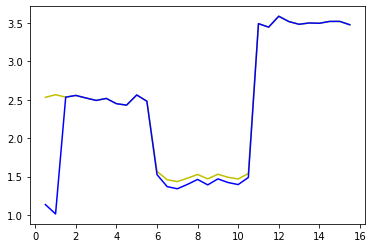

In [209]:
y_axis = values3 #network output
y = random_vals3 # x noise
x_axis = x = t_array4
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

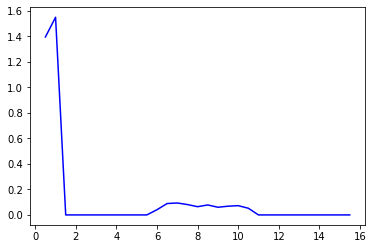

In [210]:
e_array = e3
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array4
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [211]:
data9= {'Noise_values':random_vals_t3,'Network_output':values3,'Error':e3,'T':t_array4}
vis2= pd.DataFrame(data9)
vis2

,Noise_values,Network_output,Error,T
0,"[0, 0, 2.5308151092876785]",1.135335,1.395480e+00,0.5
1,"[0, 2.564566543568015, 2.5308151092876785]",1.014225,1.550341e+00,1.0
2,"[2.5327157865230183, 2.564566543568015, 2.5308...",2.532716,1.815876e-10,1.5
3,"[2.555066915123999, 2.5327157865230183, 2.5645...",2.555067,6.504752e-11,2.0
4,"[2.5216000930792104, 2.555066915123999, 2.5327...",2.521600,1.577884e-10,2.5
5,"[2.490217497194487, 2.5216000930792104, 2.5550...",2.490217,4.395031e-10,3.0
6,"[2.5159657987221022, 2.490217497194487, 2.5216...",2.515966,1.465601e-10,3.5
7,"[2.4476786271919413, 2.5159657987221022, 2.490...",2.447679,1.167648e-09,4.0
8,"[2.428820414091782, 2.4476786271919413, 2.5159...",2.428820,2.260972e-09,4.5
9,"[2.561170643946091, 2.428820414091782, 2.44767...",2.561171,1.509548e-11,5.0


#### Example 4(step size = 0.75)

In [212]:
random_vals4 = []
random_vals4 = box_muller(x_array5,std_dev,_mean)
random_vals_t4 = triple_converter(random_vals4)
values4,e4,w = train_weights3(random_vals_t4, 0.01,15)

>epoch=0, lrate=0.010, error=0.811, , sum_error=51.504
>epoch=1, lrate=0.010, error=0.811, , sum_error=51.504
>epoch=2, lrate=0.010, error=0.380, , sum_error=44.695
>epoch=3, lrate=0.010, error=0.142, , sum_error=36.682
>epoch=4, lrate=0.010, error=0.046, , sum_error=27.870
>epoch=5, lrate=0.010, error=0.014, , sum_error=21.799
>epoch=6, lrate=0.010, error=0.004, , sum_error=19.987
>epoch=7, lrate=0.010, error=0.001, , sum_error=19.005
>epoch=8, lrate=0.010, error=0.000, , sum_error=18.228
>epoch=9, lrate=0.010, error=0.000, , sum_error=17.622
>epoch=10, lrate=0.010, error=0.000, , sum_error=17.082
>epoch=11, lrate=0.010, error=0.000, , sum_error=16.516
>epoch=12, lrate=0.010, error=0.000, , sum_error=15.883
>epoch=13, lrate=0.010, error=0.000, , sum_error=15.174
>epoch=14, lrate=0.010, error=0.000, , sum_error=14.397


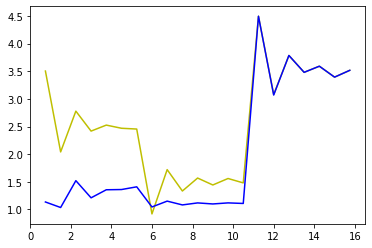

In [213]:
y_axis = values4 #network output
y = random_vals4 # x noise
x_axis = x = t_array5
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Error representation

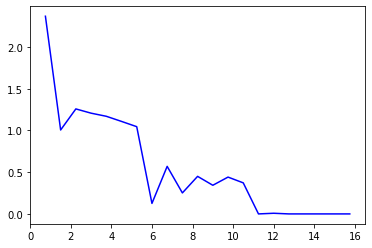

In [214]:
e_array = e4
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array5
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [215]:
#itr,input,output,error
data_10= {'Noise_values':random_vals_t4,'Network_output':values4,'Error':e4,'T':t_array5}
vis3= pd.DataFrame(data_10)
vis3

,Noise_values,Network_output,Error,T
0,"[0, 0, 3.5028611953440185]",1.135335,2.367526e+00,0.75
1,"[0, 2.040731049786509, 3.5028611953440185]",1.035404,1.005327e+00,1.50
2,"[2.7782931767198003, 2.040731049786509, 3.5028...",1.520710,1.257583e+00,2.25
3,"[2.417182068436116, 2.7782931767198003, 2.0407...",1.210548,1.206634e+00,3.00
4,"[2.525539640277337, 2.417182068436116, 2.77829...",1.356185,1.169355e+00,3.75
5,"[2.4684226141031855, 2.525539640277337, 2.4171...",1.360428,1.107995e+00,4.50
6,"[2.4542443989305682, 2.4684226141031855, 2.525...",1.409381,1.044864e+00,5.25
7,"[0.9195048486066313, 2.4542443989305682, 2.468...",1.045316,1.258110e-01,6.00
8,"[1.7202739027260319, 0.9195048486066313, 2.454...",1.150822,5.694522e-01,6.75
9,"[1.3338079208799525, 1.7202739027260319, 0.919...",1.082222,2.515855e-01,7.50


# Perceptron model with different learning rates

## Example 1

In [216]:
random_vals1 = []
random_vals1 = box_muller(x_save2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.006531,5)

>epoch=0, lrate=0.007, error=0.042
>epoch=1, lrate=0.007, error=0.042
>epoch=2, lrate=0.007, error=0.042
>epoch=3, lrate=0.007, error=0.042
>epoch=4, lrate=0.007, error=0.042


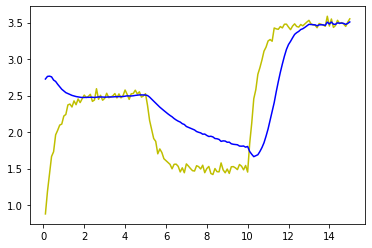

In [217]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

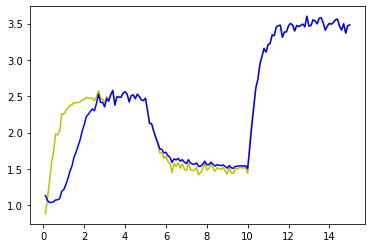

In [218]:
y_axis = values2 #network output
y = random_vals2 # x noise
x_axis = x = t_save2
plt.plot(x,y,"y") #actual
plt.plot(x_axis,y_axis,"b")#noise
plt.show()

## Example 2

In [219]:
random_vals1 = []
random_vals1 = box_muller(x_array2,std_dev,_mean)
values1,e1 = train_weights(random_vals1, 0.06531,5)

>epoch=0, lrate=0.065, error=-1.385
>epoch=1, lrate=0.065, error=-1.385
>epoch=2, lrate=0.065, error=-1.385
>epoch=3, lrate=0.065, error=-1.385
>epoch=4, lrate=0.065, error=-1.385


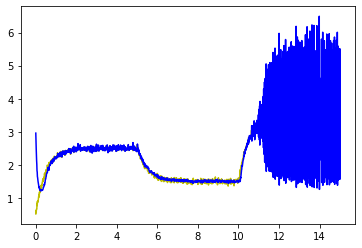

In [220]:
y_axis = values1 #network output
y = random_vals1
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

## Example 3

In [221]:
random_vals8 = []
random_vals8 = box_muller(x_array2,std_dev,_mean)
values8,e8 = train_weights(random_vals8, 0.6531,5)

>epoch=0, lrate=0.653, error=2.508
>epoch=1, lrate=0.653, error=2.508
>epoch=2, lrate=0.653, error=2.508
>epoch=3, lrate=0.653, error=2.508
>epoch=4, lrate=0.653, error=2.508


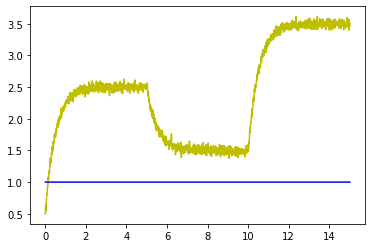

In [222]:
y_axis = values8 #network output
y = random_vals8
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [223]:
data_11= {'Noise_values':random_vals8,'Network_output':values8,'Error':e8,'T':t_array2}
vis8= pd.DataFrame(data_11)
vis8

,Noise_values,Network_output,Error,T
0,0.497073,1.0,-0.502927,0.01
1,0.633098,1.0,-0.366902,0.02
2,0.543984,1.0,-0.456016,0.03
3,0.616193,1.0,-0.383807,0.04
4,0.671301,1.0,-0.328699,0.05
...,...,...,...,...
1496,3.573423,1.0,2.573423,14.97
1497,3.498695,1.0,2.498695,14.98
1498,3.514146,1.0,2.514146,14.99
1499,3.449213,1.0,2.449213,15.00


In [224]:
#df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv', index = False)

In [233]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3,w = train_weights3(random_vals_t3, 0.011,100)

>epoch=0, lrate=0.011, error=-0.000, , sum_error=70.189
>epoch=1, lrate=0.011, error=-0.000, , sum_error=70.189
>epoch=2, lrate=0.011, error=-0.000, , sum_error=67.898
>epoch=3, lrate=0.011, error=-0.000, , sum_error=65.711
>epoch=4, lrate=0.011, error=-0.000, , sum_error=63.623
>epoch=5, lrate=0.011, error=-0.000, , sum_error=61.629
>epoch=6, lrate=0.011, error=-0.000, , sum_error=59.725
>epoch=7, lrate=0.011, error=-0.000, , sum_error=57.907
>epoch=8, lrate=0.011, error=-0.000, , sum_error=56.171
>epoch=9, lrate=0.011, error=-0.000, , sum_error=54.514
>epoch=10, lrate=0.011, error=-0.000, , sum_error=52.930
>epoch=11, lrate=0.011, error=-0.000, , sum_error=51.418
>epoch=12, lrate=0.011, error=-0.000, , sum_error=49.973
>epoch=13, lrate=0.011, error=-0.000, , sum_error=48.593
>epoch=14, lrate=0.011, error=-0.000, , sum_error=47.273
>epoch=15, lrate=0.011, error=-0.000, , sum_error=46.012
>epoch=16, lrate=0.011, error=-0.000, , sum_error=44.806
>epoch=17, lrate=0.011, error=-0.000, , s

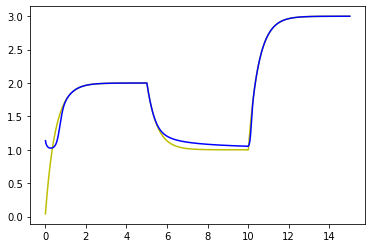

In [234]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #u_values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [227]:
w

[[2.0, 0.6343159013731817, 0.32768090105848, 0.34228073100510525],
 [2.0, 0.6343159013731817, 0.32768090105848, 0.34228073100510525],
 [2.0181770555626346,
  0.6524929569358162,
  0.3458579566211144,
  0.36045778656773964],
 [2.024277100873243,
  0.6585930022464245,
  0.35195800193172294,
  0.3665578318783482],
 [2.0301494708596266,
  0.6644653722328077,
  0.35783037191810585,
  0.3724302018647311],
 [2.0357857352615745,
  0.6701016366347553,
  0.36346663632005366,
  0.3780664662666789],
 [2.041178172969801,
  0.6754940743429825,
  0.36885907402828033,
  0.38345890397490556],
 [2.046319738836416,
  0.6806356402095967,
  0.37400063989489507,
  0.3886004698415203],
 [2.0512040304212564,
  0.6855199317944372,
  0.37888493147973523,
  0.39348476142636046],
 [2.0558252551405727,
  0.6901411565137541,
  0.3835061561990521,
  0.3981059861456773],
 [2.0601781981648353,
  0.6944940995380164,
  0.38785909922331485,
  0.4024589291699401],
 [2.0642581913157008,
  0.6985740926888819,
  0.3919390923

In [228]:
random_vals3 = []
random_vals3 = box_muller(x_array4,std_dev,_mean)
random_vals_t3 = []
random_vals_t3 = triple_converter(x_array2)
values3,e3 = train_weights(x_array2, 0.011,5)

>epoch=0, lrate=0.011, error=0.000
>epoch=1, lrate=0.011, error=0.000
>epoch=2, lrate=0.011, error=0.000
>epoch=3, lrate=0.011, error=0.000
>epoch=4, lrate=0.011, error=0.000


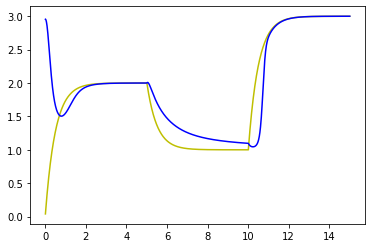

In [229]:
y_axis = values3 #network output
y = x_array2
x_axis = x = t_array2
plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

In [230]:
len(values3)

1501

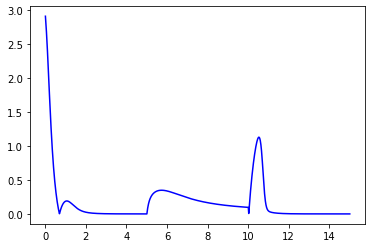

In [231]:
e_array = e3
c = 0
while c < len(e_array):
    e_array[c] = abs(e_array[c])
    c=c+1
    
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()

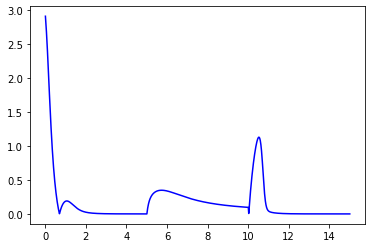

In [232]:
y_axis = e_array #network output
#y = x_array2
x_axis = x = t_array2
#plt.plot(x,y,"y") #x_noise values
plt.plot(x_axis,y_axis,"b")#percebtron(blue)
plt.show()